In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('00Table_no99.csv')
data

,sw,lw,pre,u10,vpd,lh,mean_2m_air_temperature,total_precipitation
0,194.864,341.868,86.925,1.526,4.807,50.8202,285.867889,0.031049
1,205.404,324.689,87.133,1.200,5.489,51.0719,287.354462,0.000418
2,233.936,324.139,87.015,1.365,5.344,74.3331,287.928009,0.001824
3,240.066,330.219,86.840,1.250,6.073,52.6617,286.599335,0.000678
4,298.513,290.818,86.613,2.114,6.108,51.9013,284.988403,0.009767
...,...,...,...,...,...,...,...,...
17404,119.309,259.904,100.657,1.101,3.254,12.1627,278.580170,0.000000
17405,126.007,260.870,100.496,1.199,3.274,13.9846,279.586792,0.000000
17406,94.095,288.536,100.126,1.283,1.880,10.5605,279.084564,0.000021
17407,129.525,262.488,100.052,2.101,4.960,23.5488,280.391937,0.000108


In [3]:
data_all = np.array(data)
#X = data_all[ : , :5]
X = data_all[:, [i for i in range(data_all.shape[1]) if i not in [5]]]
#X = data_all[:, [i for i in range(data_all.shape[1]) if i not in [5, 7]]]
y = data_all[ : , 5]

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101, shuffle=True)

# Train the Support Vector Classifier

In [6]:
from sklearn.svm import SVR

In [7]:

model = SVR()  #create an svr model

In [ ]:

model.fit(X_train,y_train) #train the model

In [9]:
y_pred=model.predict(X_test)

# Predictions and evaluation

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import learning_curve

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1774.8643273548919


In [11]:
# Calculate and print the evaluation metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 28.27343193910164
Mean Squared Error (MSE): 1774.8643273548919
Root Mean Squared Error (RMSE): 42.12913869704544
R-squared (R2) Score: 0.2541407270582494


coefficient of determination R^2 = 0.2541407270582494


<Figure size 432x288 with 0 Axes>

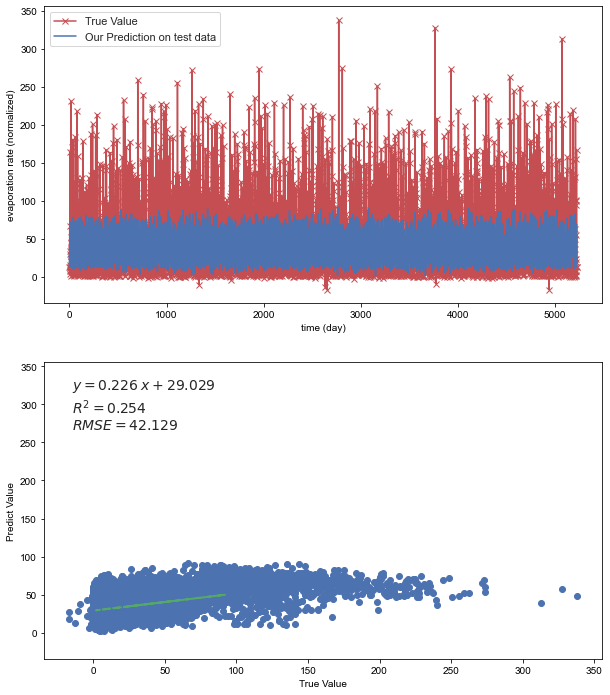

In [12]:
# plot the data
# Plot the data points
output=y_pred
fig = plt.figure()
fig,ax=plt.subplots(2, 1, figsize=(10, 12), sharey=True)

sns.set(style='whitegrid')
# Plot the true value and predicted value
ax[0].plot( y_test, marker='x', c='r',label='True Value')
ax[0].plot( output , c='b',label='Our Prediction on test data')
ax[0].set(xlabel="time (day)", ylabel="evaporation rate (normalized)")

# Create scatter plot with regression line
#sns.scatterplot(y_test, output.flatten(), ax=ax[1])
#sns.regplot(y_test, output.flatten(), ax=ax[1])
ax[1].scatter( y_test , output.flatten() , c='b')
z = np.polyfit(y_test , output.flatten() , 1)

# Calculate regression line parameters
y_hat = np.poly1d(z)(output)
plt.plot(y_pred, y_hat, "g--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test, y_pred):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test,y_pred, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.ylabel('Predict Value')

# Set the x-axis label
plt.xlabel('True Value')
ax[0].legend()
print("coefficient of determination R^2 =",r2_score(y_test,y_pred))

plt.show()

# Gridsearch CV

To find the optimal hyperparameter. These parameters are set prior to the the training process such regularization or kernel type. So that it allows to yield the best performance on a given evaluation metrics.

Finding the right parameters (like what C or gamma values to use) ,
This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train.
It saves time and effort by avoiding manual experimentation with different hyperparameter settings. 

In [13]:
from sklearn.model_selection import GridSearchCV

In [23]:
#param_grid = {'C': [0.1,1, 10, 100, 1000],'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000],'epsilon': [0.01, 0.1],'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [15]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [ ]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=rbf;, score=-0.149 total time=  11.7s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=rbf;, score=-0.133 total time=  12.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=rbf;, score=-0.146 total time=  12.2s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=rbf;, score=-0.145 total time=  11.9s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=rbf;, score=-0.140 total time=  12.2s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=-0.147 total time=  11.5s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=-0.130 total time=  10.5s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=-0.144 total time=  10.4s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=-0.143 total time=  10.5s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=-0.138 total time=  10.6s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.01, ke

[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=rbf;, score=0.240 total time=   8.1s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=rbf;, score=0.249 total time=   7.4s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=rbf;, score=0.319 total time=   7.4s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=0.274 total time=   7.6s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=0.296 total time=   8.1s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=0.230 total time=   7.9s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=0.242 total time=   7.9s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=0.301 total time=   8.5s
[CV 1/5] END C=10, epsilon=0.01, gamma=1, kernel=rbf;, score=-0.138 total time=  14.0s
[CV 2/5] END C=10, epsilon=0.01, gamma=1, kernel=rbf;, score=-0.122 total time=  11.8s
[CV 3/5] END C=10, epsilon=0.01, gamma=1, kernel=rbf;, score=-0.133 total time=  11.8s
[CV 4/5] END C=10, epsilon=0.0

[CV 1/5] END C=100, epsilon=0.1, gamma=0.01, kernel=rbf;, score=0.593 total time=  20.3s
[CV 2/5] END C=100, epsilon=0.1, gamma=0.01, kernel=rbf;, score=0.601 total time=  15.3s
[CV 3/5] END C=100, epsilon=0.1, gamma=0.01, kernel=rbf;, score=0.564 total time=  15.4s
[CV 4/5] END C=100, epsilon=0.1, gamma=0.01, kernel=rbf;, score=0.578 total time=  18.2s
[CV 5/5] END C=100, epsilon=0.1, gamma=0.01, kernel=rbf;, score=0.619 total time=  17.8s
[CV 1/5] END C=100, epsilon=0.1, gamma=0.001, kernel=rbf;, score=0.539 total time=   9.1s
[CV 2/5] END C=100, epsilon=0.1, gamma=0.001, kernel=rbf;, score=0.544 total time=   8.9s
[CV 3/5] END C=100, epsilon=0.1, gamma=0.001, kernel=rbf;, score=0.528 total time=   8.9s
[CV 4/5] END C=100, epsilon=0.1, gamma=0.001, kernel=rbf;, score=0.514 total time=   9.0s
[CV 5/5] END C=100, epsilon=0.1, gamma=0.001, kernel=rbf;, score=0.586 total time=   8.8s
[CV 1/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=0.443 total time=   7.8s
[CV 2/5] END C

 5 folds: cross validation is being performed with 5 folds, splitting the data into multiple subsets
50 candidates:  It means that there are 250 different combinations of hyperparameters to be evaluated. These combinations are obtained by taking all possible combinations of the hyperparameter values specified in the param_grid.
#250fits:  It indicates that the algorithm will fit the model 250 times in total.ach fit corresponds to training the model on a specific combination of hyperparameters and a specific fold of the data during cross-validation.

In [22]:
# Get the best model and its hyperparameters
best_model = grid.best_estimator_
best_params = grid.best_params_


In [23]:
best_model

SVR(C=1000, epsilon=0.01, gamma=0.001)

In [24]:
best_params

{'C': 1000, 'epsilon': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}

# Predictions and Evaluations

In [25]:
y_pred1 = best_model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred1)
print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)

Best Parameters: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
Mean Squared Error: 849.4757074724381


In [ ]:
# Calculate and print the evaluation metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred1)))
print("R-squared (R2) Score:", r2_score(y_test, y_pred1))

coefficient of determination R^2  after grid search= 0.6430209769885229


<Figure size 432x288 with 0 Axes>

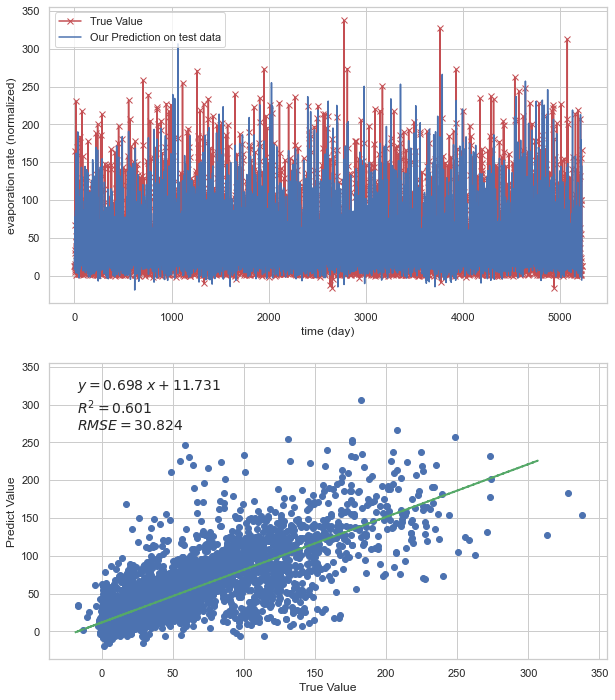

In [27]:
# plot the data
# Plot the data points
output=y_pred1
fig = plt.figure()
fig,ax=plt.subplots(2, 1, figsize=(10, 12), sharey=True)

sns.set(style='whitegrid')
# Plot the true value and predicted value
ax[0].plot( y_test, marker='x', c='r',label='True Value')
ax[0].plot( output , c='b',label='Our Prediction on test data')
ax[0].set(xlabel="time (day)", ylabel="evaporation rate (normalized)")

# Create scatter plot with regression line
#sns.scatterplot(y_test, output.flatten(), ax=ax[1])
#sns.regplot(y_test, output.flatten(), ax=ax[1])
ax[1].scatter( y_test , output.flatten() , c='b')
z = np.polyfit(y_test , output.flatten() , 1)

# Calculate regression line parameters
y_hat1 = np.poly1d(z)(output)
plt.plot(y_pred1, y_hat1, "g--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test, y_hat1):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test,y_hat1, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.ylabel('Predict Value')

# Set the x-axis label
plt.xlabel('True Value')
ax[0].legend()
print("coefficient of determination R^2  after grid search=",r2_score(y_test,y_pred1))

plt.show()

# Learning Curve

In [28]:
import numpy as np
from sklearn.model_selection import learning_curve

In [29]:
# Generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(best_model, X, y,  cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

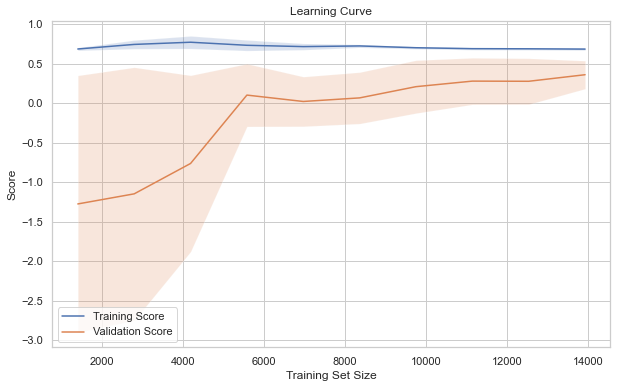

In [30]:
# Calculate the mean and standard deviation of training scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve

fig = plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, val_scores_mean, label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()